# **Tópicos**

<ol type="1">
  <li>Como ajudar a diminuir a inadimplência de uma instituição financeira?;</li>
  <li>Quais dados temos para a exploração?;</li>
  <li>Limpando os dados;</li>
  <li>Visualizando os dados após limpeza;</li>
  <li>Interpretação dos dados analisados.</li>
</ol>


---

## 1\. Como ajudar a diminuir a inadimplência de uma instituição financeira?

## 2\. Quais dados temos para a exploração?

Para poder fazer essa análise, iremos usar dados de uma instistuição financeira.
Esses dados estão em formato CSV e estão neste link:
https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv

O que estamos buscando?
O nosso interesse é extrair o número de clientes inadimplentes dessa base de dados (**default = 1**), para assim, tentar encontrar padrões, explicações, que nos mostrem o porque uma pessoa vira inadimplente. E com esses dados, tentar previnir futuros devedores.

* Variável resposta (ou variável independente) = **default**, que é a nossa variável de interesse.
* Variáveis explicativas (ou independentes/preditoras) = **atributos** dos clientes (escolaridade, idade, salário, etc)




| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta do cliente|
| default | Mostra se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Salário mensal do cliente multiplicado por 12 (salário anual) |
| tipo_cartao | Tipo do cartão do cliente: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantos meses o cliente já tem a conta bancária aberta |
| qtd_produtos | Quantos produtos bancários esse cliente tem |
| iteracoes_12m | Quantas vezes o cliente interagiu nos últimos 12 meses |
| meses_inatico_12m | Quantos meses o cliente não fez alguma movimentação nos últimos 12 meses |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Valor gasto no cartão de crédito nos últimos 12 meses |
| qtd_transacoes_12m | Quantidade de transações no cartão de crédito nos últimos 12 meses |



**Primeiro, vamos importar o pandas (apelido pd), para podermos visualizar a lista do link acima.**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

In [4]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


**Como podemos ver acima, temos 16 colunas com dados de cada cliente.**

**O nosso desafio é encontrar quais colunas são realmente informativas para a nossa conclusão.**

### **2.1. Como estão estruturados os dados do link?** 

In [5]:
df.shape

(10127, 16)

**Ou seja, temos um total de 10.127 linhas (número de clientes da base de dados) e 16 colunas.**

In [6]:
df[df['default'] == 0].shape

(8500, 16)

**Dos 10.127 clientes, 8.500 são adimplentes.**

In [7]:
df[df['default'] == 1].shape

(1627, 16)

**Dos 10.127 clientes, 1627 são inadimplentes. Ou seja, 1627 clientes tem algum tipo de dívida com essa instituição financeira.**

In [8]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [9]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


### **2.2. Dados estruturados do banco de dados (schema):** 

In [10]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Acima podemos ver as colunas e os seus dados.

**Note que o 'salario_anual' não é aberto para mostrar a renda exata do cliente, mas, sim, para separar os clientes em 'blocos de renda'.**

In [11]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Acima temos os **tipos** dos dados que extraímos. 

**Perceba que o salário anual está descrito como um objeto.**

In [12]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Acima temos a lista de **atributos categóricos**.
Como podemos ver, por exemplo, existem 4 tipos de cartões, e o blue é o mais frequente.

**Perceba que nas linhas: escolaridade, estado civil e salario anual, não temos uma contagem de 10.127. 
Ou seja, alguns clientes estão com suas informações incompletas.**

In [13]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Acima temos a lista de **atributos numéricos**.
Um dado interessante é o número de dependentes. Mesmo com 10127 clientes, **nenhum** deles tem mais do que 5 dependentes. Será que essa informação é valiosa para nossa questão de inadimplência?

### **2.3. Dados que podem estar faltando:** 

 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

In [14]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


**Abaixo vamos lembrar em quais colunas temos algum dado faltando:**

In [15]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

**Note que alguns clientes estão com seus cadastros incompletos nos campos:**
1. Escoladirade
2. Estado Civil
3. Salário Anual

**Vamos ver quantos clientes estão com os cadastros incompletos?**

In [16]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [17]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


* **1519** clientes não informaram a sua **escolaridade**.
* **749** clientes não informaram o seu **estado civil**.
* **1112** clientes não informaram o seu **salário anual**.

In [18]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


* Dos 1519 clientes que não informaram a sua escolaridade, **1263** são adimplentes.
* Dos 749 clientes que não informaram o seu estado civil, **620** são adimplentes.
* Dos 1112 clientes que não informaram o seu salário anual, **925** são adimplentes.

In [19]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


* Dos 1519 clientes que não informaram a sua escolaridade, **256** são inadimplentes.
* Dos 749 clientes que não informaram o seu estado civil, **129** são inadimplentes.
* Dos 1112 clientes que não informaram o seu salário anual, **187** são inadimplentes.

## 3\. Limpando os dados

Para podermos analisar melhor os nossos dados, vamos fazer alguns ajustes:

1. Arrumar os **tipos** de algumas colunas;
2. Remover clientes que tem dados faltando.

### **3.1. Alterando os tipos de algumas colunas** 

Quando verificamos os tipos dos dados anteriormente, percebemos que algumas colunas precisam ser arrumadas.
As colunas **limite de crédito** e **valor de transações em 12 meses** estão classificadas como **objeto**. Mas, elas precisam ser colunas do **tipo float**.

Elas foram classificadas como objeto pelo programa, pois, estão com o formato numérico do padrão brasileiro. Precisamos alterar esses dados para o padrão do programa. Veja os padrões:
* Padrão Brasil: **2.328,43**
* Padrão do programa: **2328.43**

Vamos alterar isso, para o programa começar a reconhecer os números como números.

In [20]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

Veja acima como realmente as colunas estão classificadas como **objeto**.

In [21]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Veja acima, os dados estão realmente no padrão Brasil.

Abaixo vamos criar uma função que altere os dados que estão no padrão Brasil, para o padrão do programa.

In [22]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


**Repare no print de resposta da função acima, os valores originais (padrão Brasil) realmente foram limpos e alterados para o padrão do programa.**

**Agora vamos aplicar a função criada nas colunas da nossa base de dados.**

In [23]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Vamos conferir se realmente conseguimos alterar as nossas colunas **objeto** para **float**:

In [24]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

 Sucesso!
 As colunas **limite_credito** e **valor_transacoes_12m** foram alteradas com êxito.
 Abaixo vamos conferir como ficam os atributos categóricos e numéricos:
 
 - Novos atributos **categóricos**.

In [25]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


 - Novos atributos **numéricos**.

In [26]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### **3.2. Removendo cadastros incompletos** 

Sabemos que não podemos trabalhar com cadastros incompletos (que tenham algum dado faltando).
Por isso, o próximo passo é extrair os clientes que estão com cadastros incompletos, e verificar se isso afetará a nossa proporção de clientes **default 0** e **default 1**.

In [27]:
df.dropna(inplace=True)

Agora vamos verificar quantos cadastros realmente estão completos:

In [28]:
df.shape

(7081, 16)

Temos 7081 cadastros completos.
Quantos desses são adimplentes (**default == 0**)?

In [29]:
df[df['default'] == 0].shape

(5968, 16)

Ou seja, dentro dos **7081** cadastros completos, **5968** são adimplentes.

In [30]:
df[df['default'] == 1].shape

(1113, 16)

Restaram portanto, **1113** cadastros de inadimplentes.

In [31]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

Finalmente vamos ver como estava a proporção de adimplentes/inadimplentes **antes** de nossas alterações e como ela fica **depois** de nossa limpeza:

In [33]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


Note que a proporção praticamente não foi alterada:
*  **Antes** da nossa limpeza de dados, **83.93%** dos clientes eram adimplentes.
*  **Depois** da nossa limpeza, **84,28%** dos clientes são adimplentes.

Vamos adiante.

## 4\. Visualizando os dados após a limpeza

Com os dados **limpos**, temos o caminho aberto para podermos fazer alguns gráficos que facilitam a nossa análise.
Os gráficos vão ser usados para comparar os dados dos clientes **default == 0** e **default == 1**.

Para isso, vamos importar o **seaborn** (apelido sns).

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

In [42]:
df_adimplente = df[df['default'] == 0]

In [43]:
df_inadimplente = df[df['default'] == 1]

### **4.1. Gráficos de visualizações categóricas** 

In [44]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


*** Estado Civil**

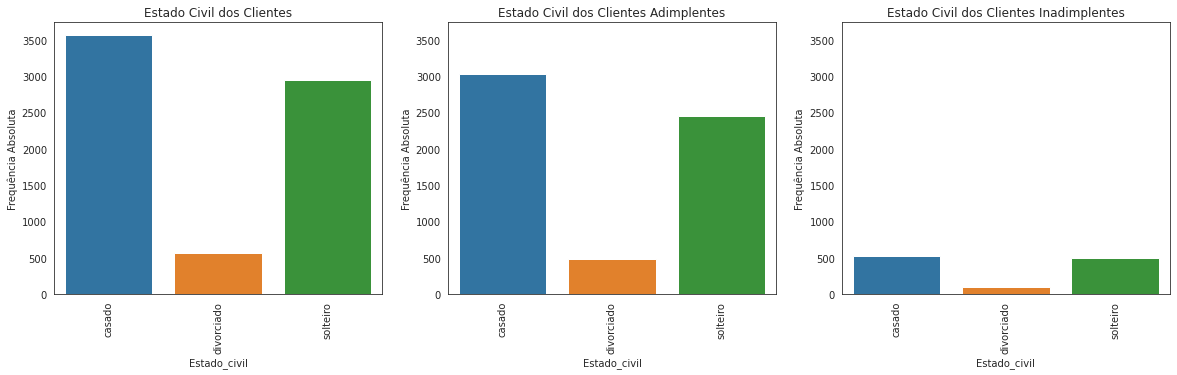

In [49]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Notamos que o estado civil não contribui para nossa pesquisa, pois, os padrões se mantêm. 

*** Escolaridade**

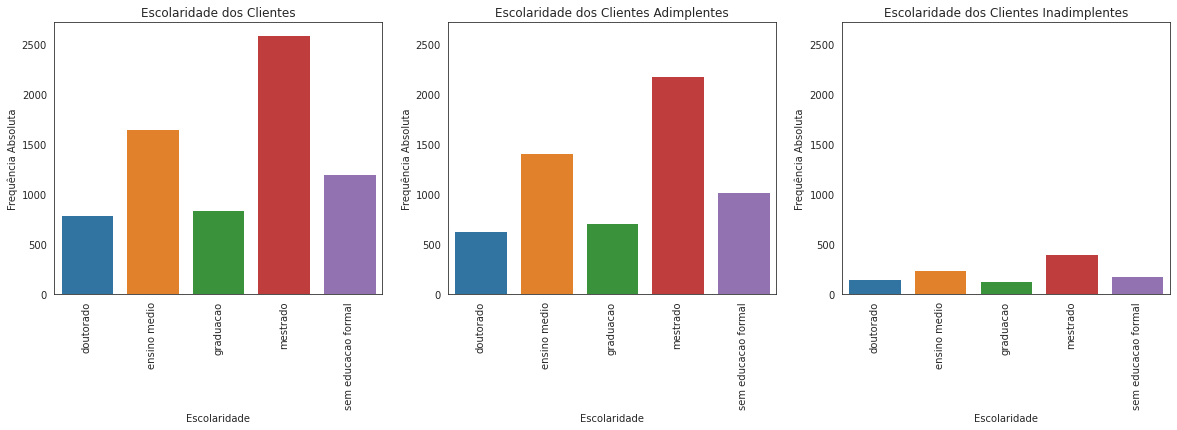

In [50]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Notamos que a escolaridade não contribui para nossa pesquisa, pois, os padrões se mantêm. 

* **Salário Anual**

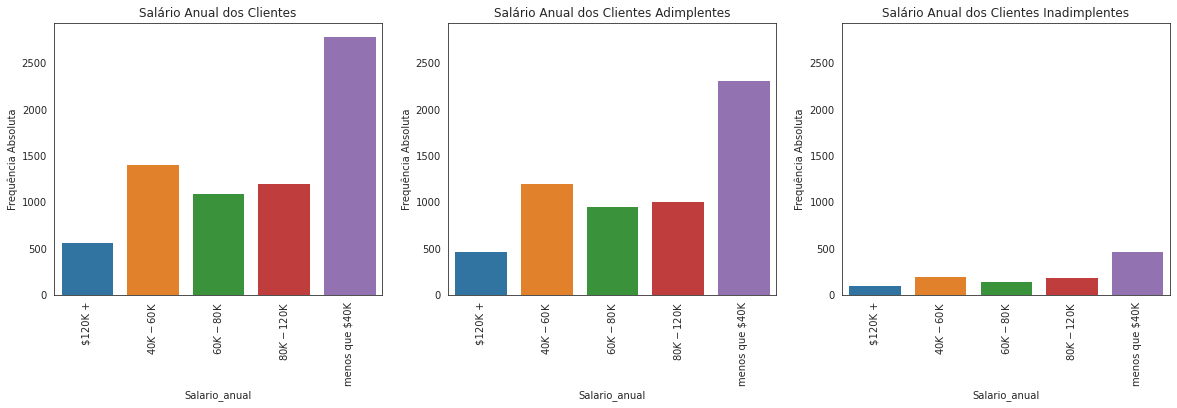

In [51]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

Notamos que o salário anual não contribui para nossa pesquisa, pois, os padrões se mantêm. 

*** Tipo de cartão**

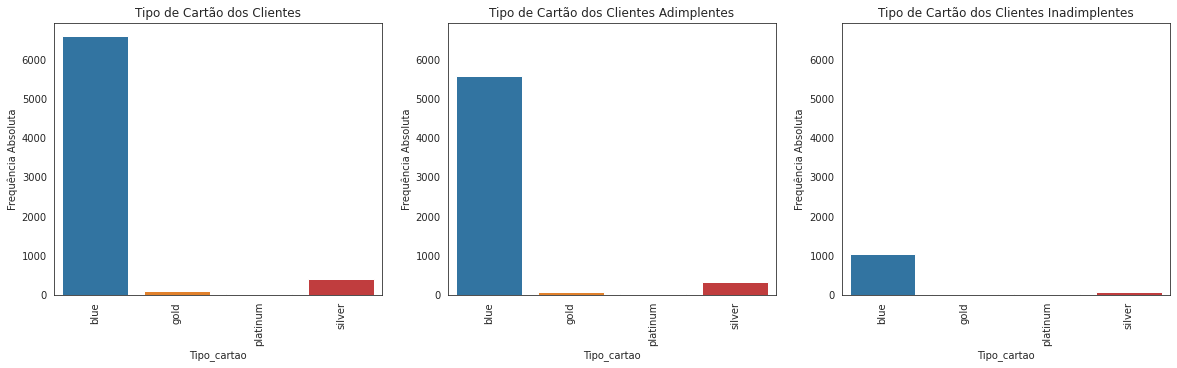

In [52]:
coluna = 'tipo_cartao'
titulos = ['Tipo de Cartão dos Clientes', 'Tipo de Cartão dos Clientes Adimplentes', 'Tipo de Cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

Notamos que o tipo de cartão não contribui para nossa pesquisa, pois, os padrões se mantêm. 

### **4.2. Gráficos de visualizações numéricas** 

In [53]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


* **Idade**

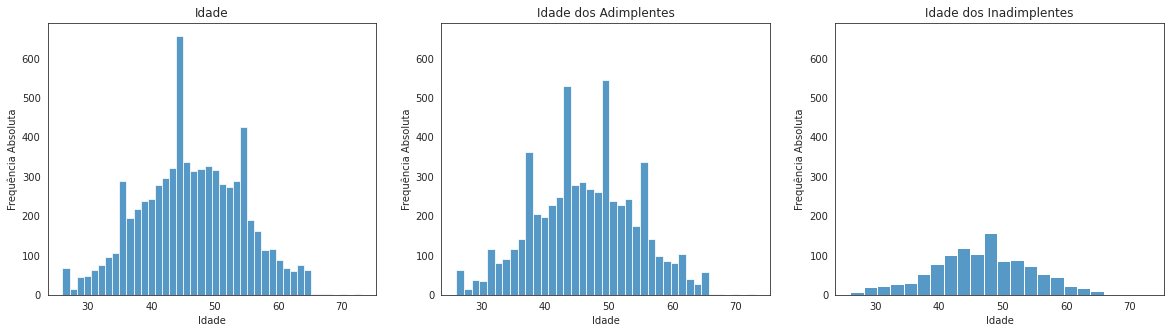

In [54]:
coluna = 'idade'
titulos = ['Idade', 'Idade dos Adimplentes', 'Idade dos Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**Os gráficos que mostram a idade dos clientes se provaram úteis.
Repare o gráfico de adimplentes e inadimplentes, como a proporção é bem diferente.**

* **Dependentes**

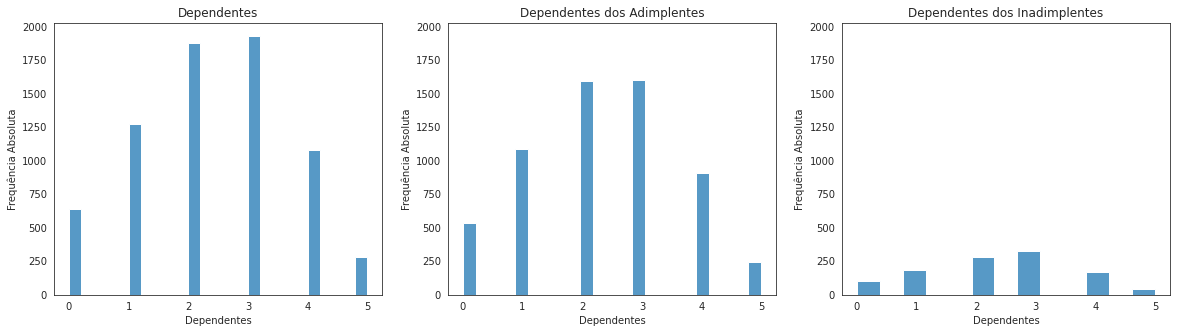

In [55]:
coluna = 'dependentes'
titulos = ['Dependentes', 'Dependentes dos Adimplentes', 'Dependentes dos Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* **Meses de relacionamento**

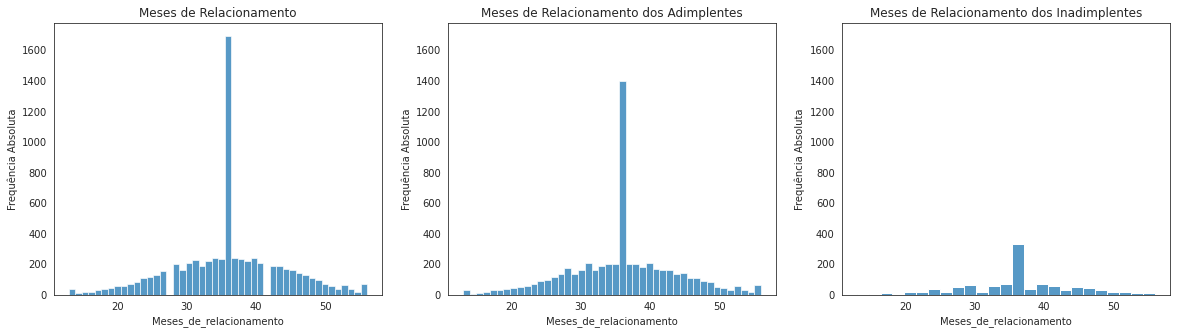

In [56]:
coluna = 'meses_de_relacionamento'
titulos = ['Meses de Relacionamento', 'Meses de Relacionamento dos Adimplentes', 'Meses de Relacionamento dos Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

 - **Quantidade de Transações nos Últimos 12 Meses**

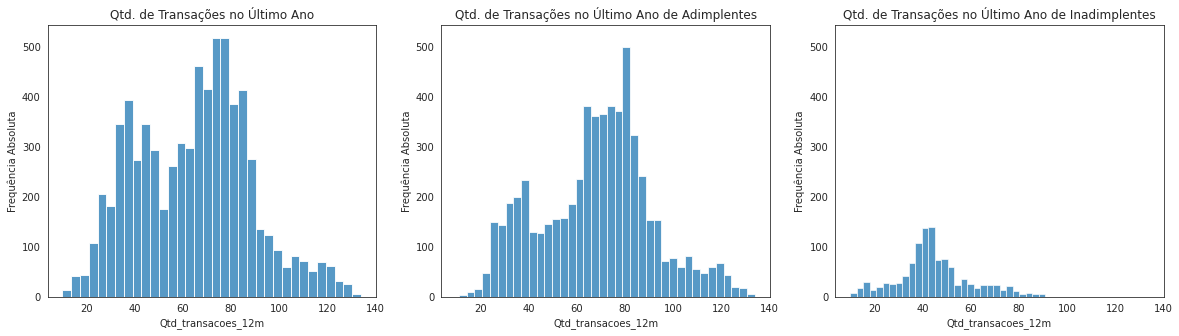

In [57]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Os gráficos que mostram as '**quantidades de transações no último ano**' se provaram **úteis**.
Repare o gráfico de adimplentes e inadimplentes, como a proporção é bem diferente.

 - **Valor das Transações nos Últimos 12 Meses**

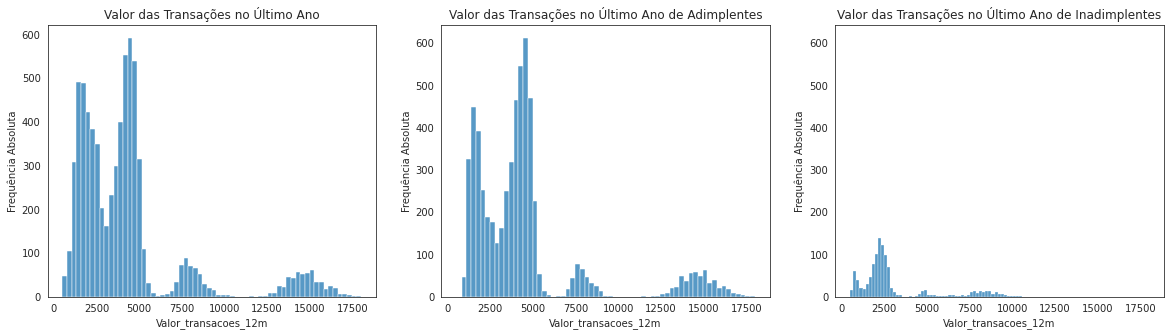

In [58]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Os gráficos que mostram os **'valores de transações nos último ano'** se provaram **úteis**.
Repare o gráfico de adimplentes e inadimplentes, como a proporção é bem diferente.

Vamos usar os gráficos:

1. **Valor de transações nos últimos 12 meses**
2. **Quantidade de transações nos últimos 12 meses**

Eles se mostraram mais relevantes.
Faremos um gráfico com essas 2 categorias de dados.

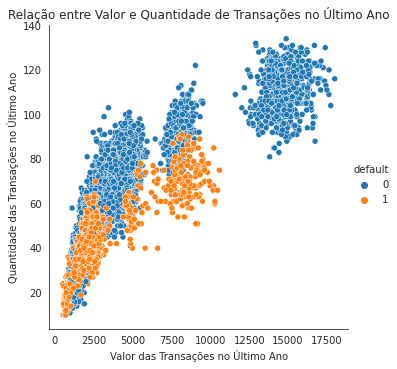

In [62]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

* **Default 0 são os clientes adimplentes (cor azul do gráfico)**
* **Default 1 são os clientes inadimplentes (cor laranja do gráfico)**

## 5\. Interpretação dos dados analisados

De acordo com os gráficos gerados acima, temos uma boa ideia de quais clientes a instituição financeira em questão precisa dar mais atenção.

Qual público a empresa **não** precisa se preocupar?
- Os que tem valores de transações anuais de 10.000 ou mais.
- Os clientes que fazem 80 ou mais transações por ano.

Qual público a empresa precisa dar mais atenção?
- Clientes que tem uma quantidade de transações anuais entre 30 e 55.
- Clientes que tem um valor de transações anuais entre 1500 e 3000.

Caso a empresa mantenha contato com os clientes descritos acima (os prováveis futuros inadimplentes), com certeza o valor destinado para provisão de devedores duvidosos vai cair.
O que a instituição precisa perguntar para o cliente é: caso você precise, o que posso fazer para lhe ajudar?

Parcelar dívidas por exemplo, pode ser uma boa solução.

**Obrigado pela leitura!
Tudo de bom para você :)**

____